In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("winequality-red.csv")

In [32]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine

In [33]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [35]:
df_corr_quality=pd.DataFrame(df.corr().loc[: , 'quality']).reset_index()
df_corr_quality.columns=['Columns' , 'Correlation with quality']
df_corr_quality

,Columns,Correlation with quality
0,fixed acidity,0.124052
1,volatile acidity,-0.390558
2,citric acid,0.226373
3,residual sugar,0.013732
4,chlorides,-0.128907
5,free sulfur dioxide,-0.050656
6,total sulfur dioxide,-0.185100
7,density,-0.174919
8,pH,-0.057731
9,sulphates,0.251397


In [36]:
df.duplicated().sum()

240

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [40]:
df.shape

(1359, 12)

In [41]:
df[df.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [42]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

(array([ 10.,   0.,  53.,   0., 577.,   0., 535.,   0., 167.,  17.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

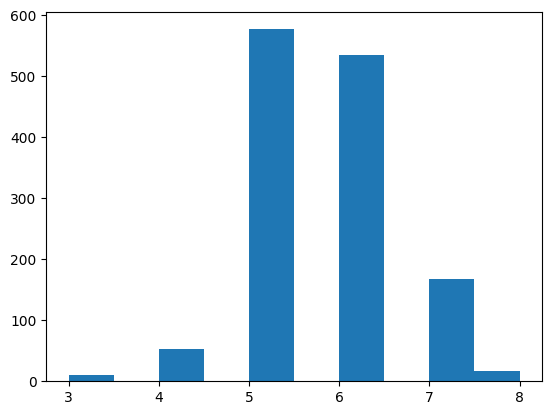

In [43]:
plt.hist(df['quality'])

In [44]:
df_corr_quality

,Columns,Correlation with quality
0,fixed acidity,0.124052
1,volatile acidity,-0.390558
2,citric acid,0.226373
3,residual sugar,0.013732
4,chlorides,-0.128907
5,free sulfur dioxide,-0.050656
6,total sulfur dioxide,-0.185100
7,density,-0.174919
8,pH,-0.057731
9,sulphates,0.251397


In [45]:
df['fixed acidity'].describe()

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

(array([ 41., 196., 456., 315., 163.,  92.,  66.,  21.,   4.,   5.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

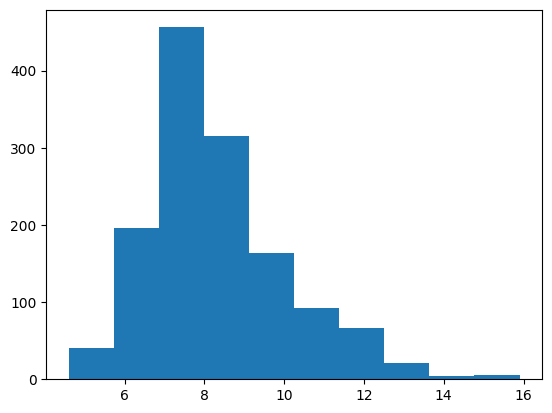

In [46]:
plt.hist(df['fixed acidity'] )

In [47]:
df['fixed acidity'].mode()

0    7.2
Name: fixed acidity, dtype: float64

### Data is right skewed , with a thin tail which means there exists a few outliers on on higher side. Since STD is low it can be concluded that almost values are close to mean

**mean  8.31**

**median 7.9**

Here the mean > median which further confirms the above analysis

**mode 7.2** 

Here the mode value is closer to median and mean 

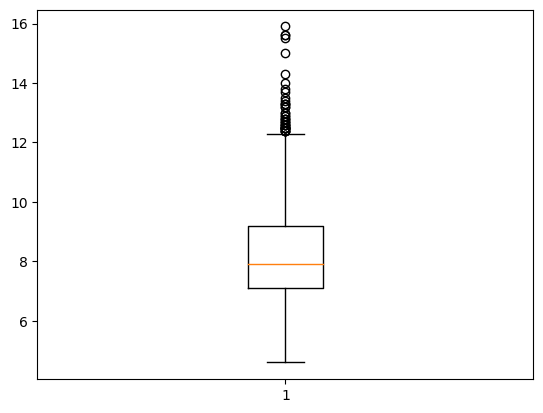

In [48]:
plt.boxplot(df['fixed acidity'])
plt.show()

In [49]:
Q1=7.1
Q2=7.9
Q3=9.2
print(Q1 ,Q2 , Q3)

7.1 7.9 9.2


In [50]:
IQR=9.2-7.1
IQR=round(IQR , 2)
IQR

2.1

In [51]:
upper_bound=round(Q3+(1.5*IQR) , 2)
lower_bound=round(Q1-(1.5*IQR) , 2)
print(upper_bound)
print(lower_bound)

12.35
3.95


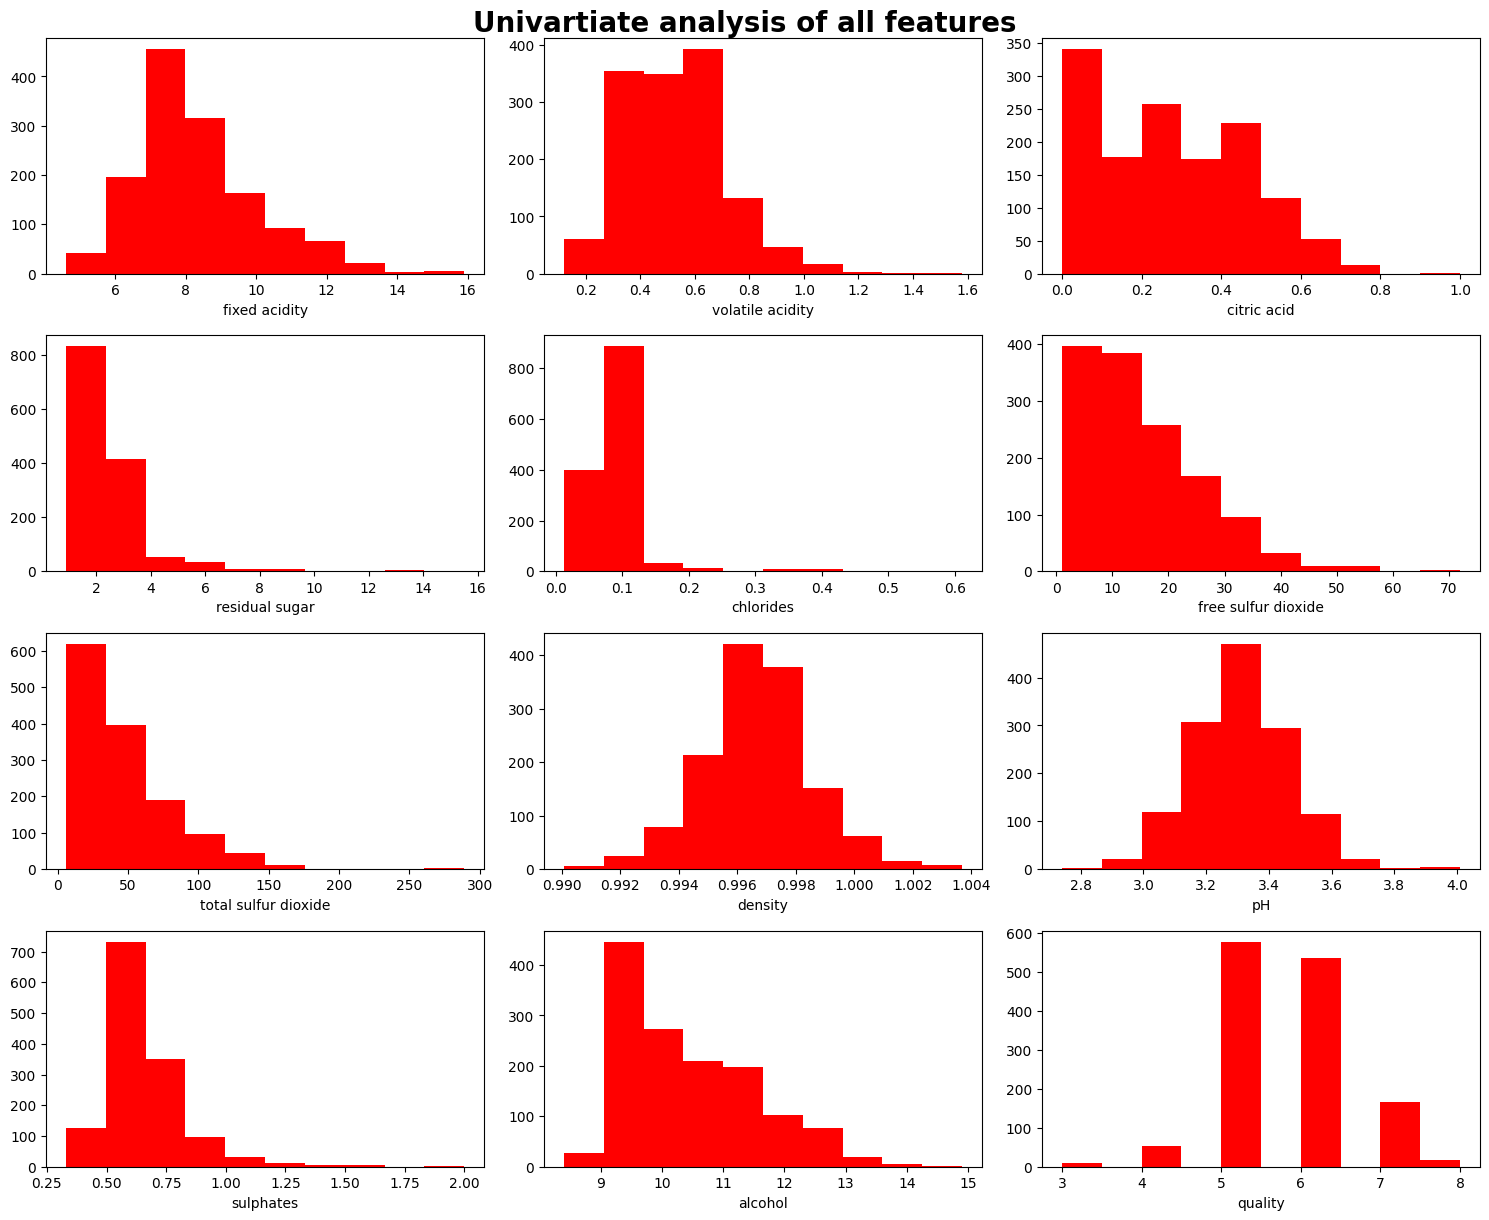

In [52]:
plt.figure(figsize=(15 , 15))
plt.suptitle("Univartiate analysis of all features" , fontsize=20  , fontweight='bold')
columns=list(df.columns)

for i in range(0 , len(columns)):
    plt.subplot(5  , 3 , i+1)
    plt.hist(x=df[columns[i]] , fill=True, color='r')
    plt.xlabel(columns[i])
    plt.tight_layout()

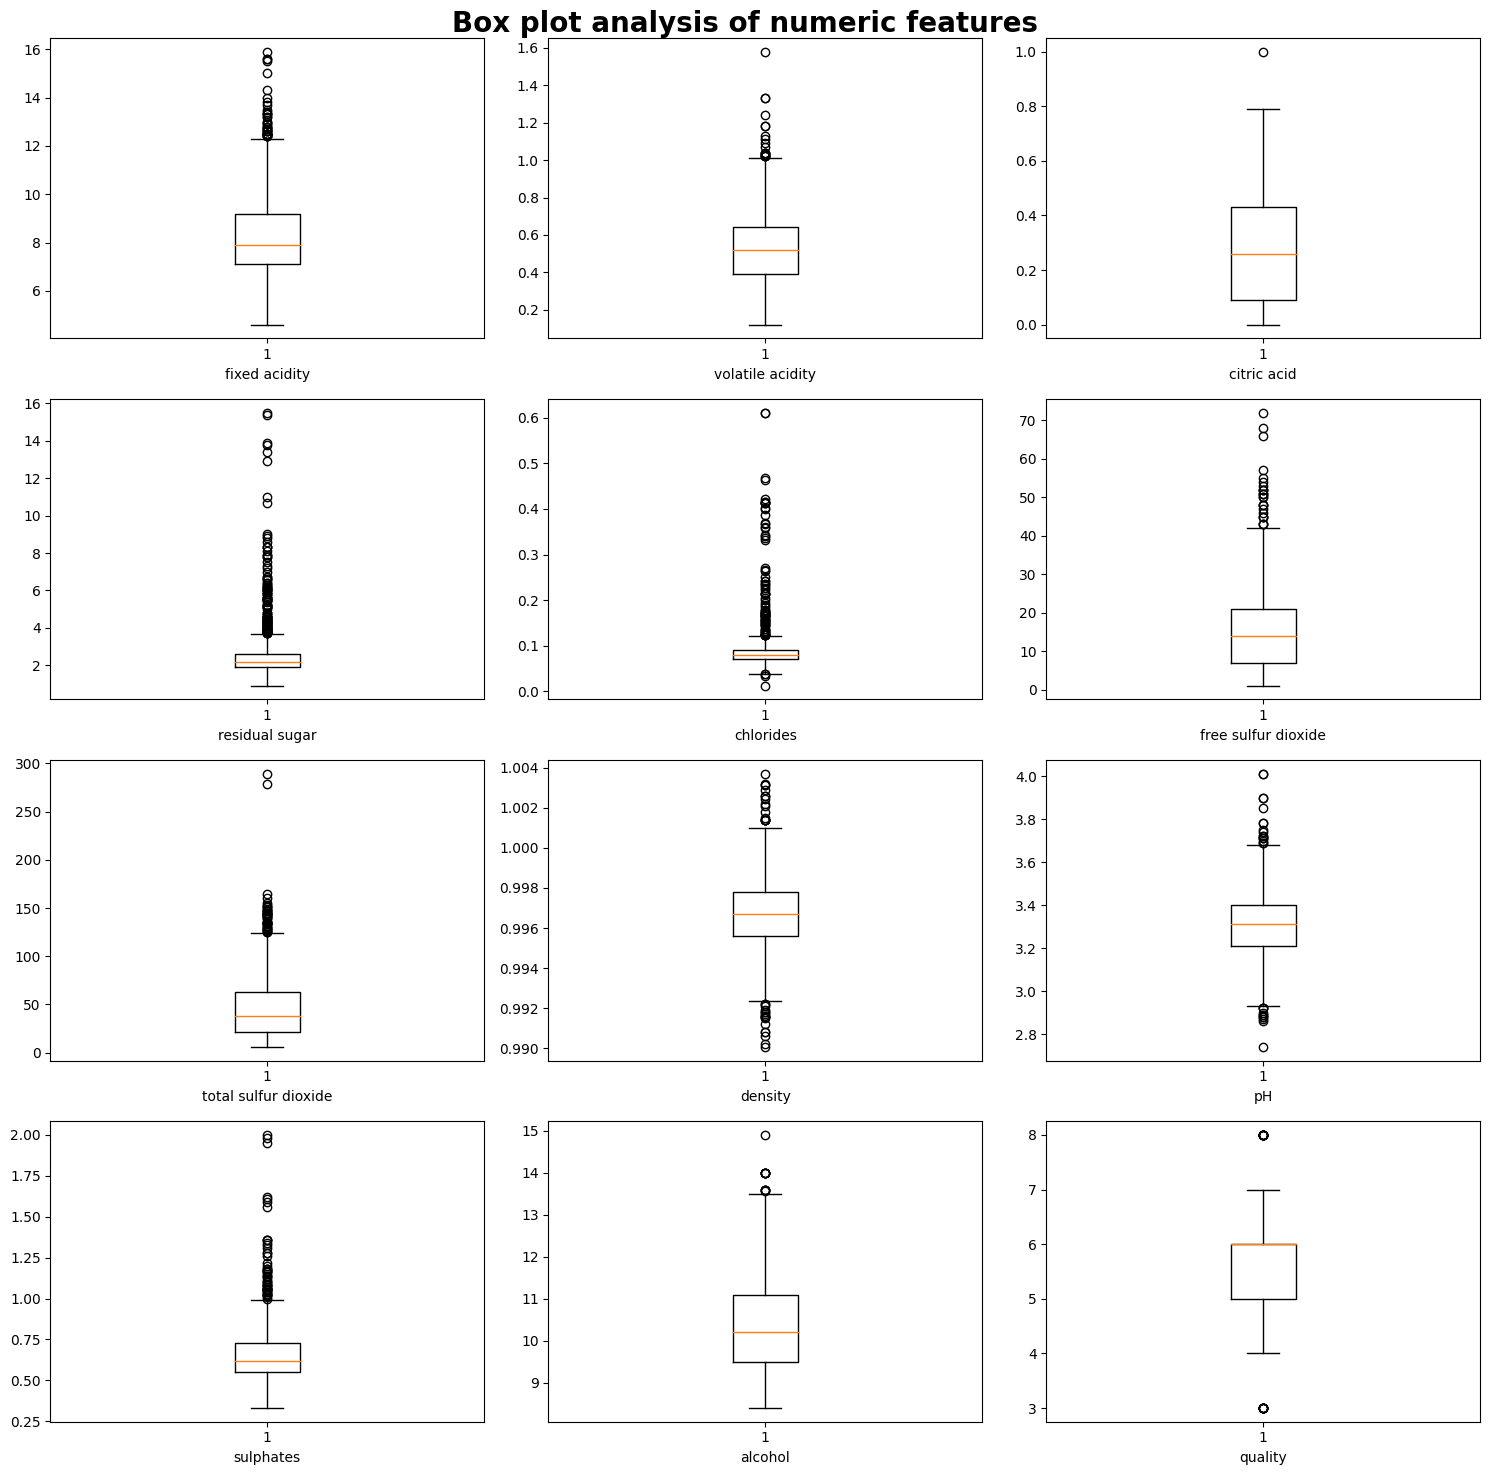

In [53]:
plt.figure(figsize=(15 , 15))
plt.suptitle("Box plot analysis of numeric features" , fontsize=20 ,fontweight='bold')

for i in range(0 , len(columns)):
    plt.subplot(4 , 3 , i+1)
    plt.boxplot(x=df[columns[i]])
    plt.xlabel(columns[i])
    plt.tight_layout()


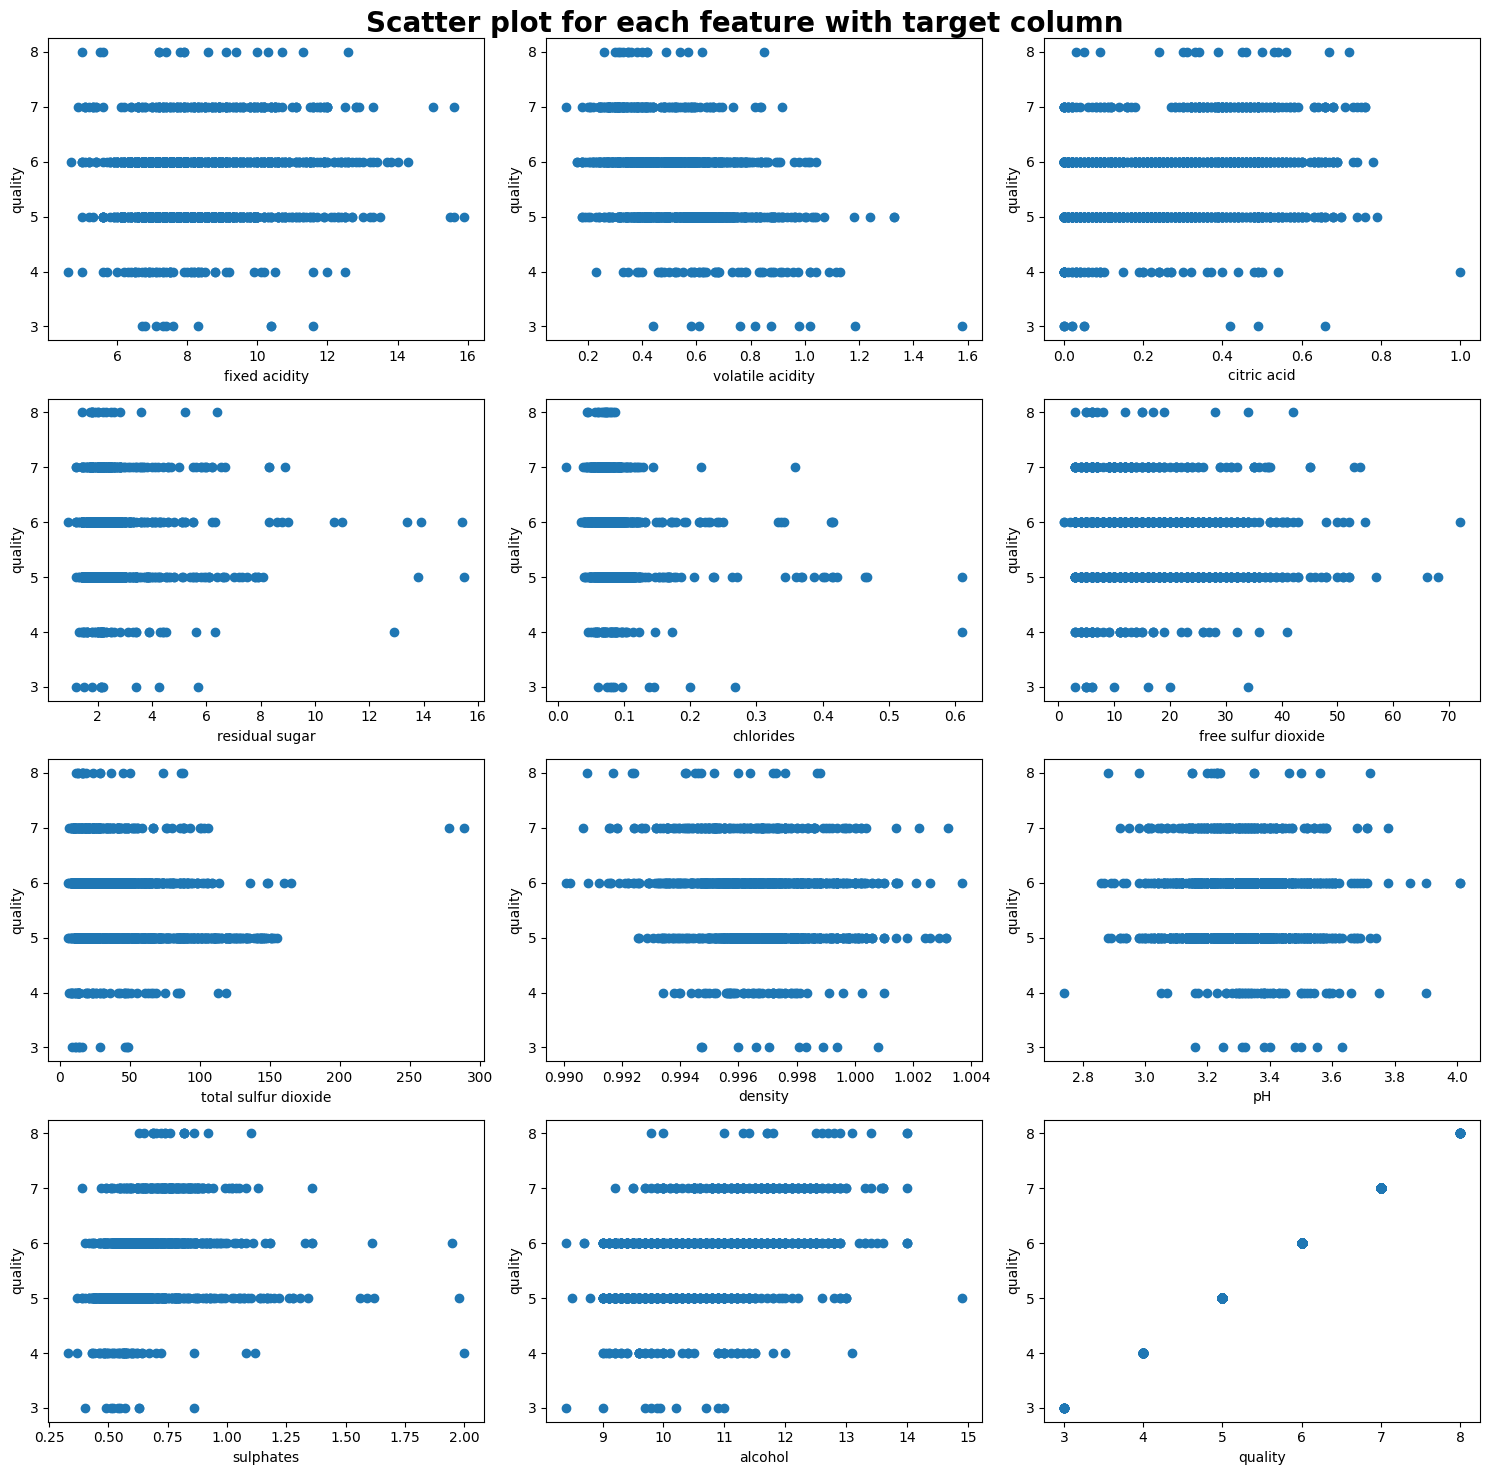

In [54]:
plt.figure(figsize=(15 , 15))
plt.suptitle("Scatter plot for each feature with target column" , fontsize=20 , fontweight='bold')

for i in range(0,  len(columns)):
    plt.subplot(4 , 3 , i+1)
    plt.scatter(x=df[columns[i]] , y=df['quality'])
    plt.xlabel(columns[i])
    plt.ylabel('quality')
    plt.tight_layout()

#### Important features that affect the wine quality : 

positively correlated : Alcohol , sulphates , citric acid  , fixed acidity

negatively correlated : volatile acidity

### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

In [55]:
df=pd.read_csv("winequality-red.csv")

In [56]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the wine quality dataset . But if they existed following approach will be followed :

1. If the values are normally distributed then : mean imputation would be used
2. If the values are skewed (left , right) then : median imputation would be used

### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [58]:
df=pd.read_csv("stud.csv")

In [59]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [60]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 342.8 KB


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [62]:
df.duplicated().sum()

0

In [63]:
for col in df.columns:
    if df[col].dtype=='O':
        print(col)
        print(df[col].unique())
        print(df[col].nunique())
        print()

gender
['female' 'male']
2

race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
5

parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
6

lunch
['standard' 'free/reduced']
2

test_preparation_course
['none' 'completed']
2



In [64]:
import matplotlib.pyplot as plt

In [65]:
numeric_col=[col  for col in df.columns if df[col].dtypes!='O']

In [66]:
numeric_col

['math_score', 'reading_score', 'writing_score']

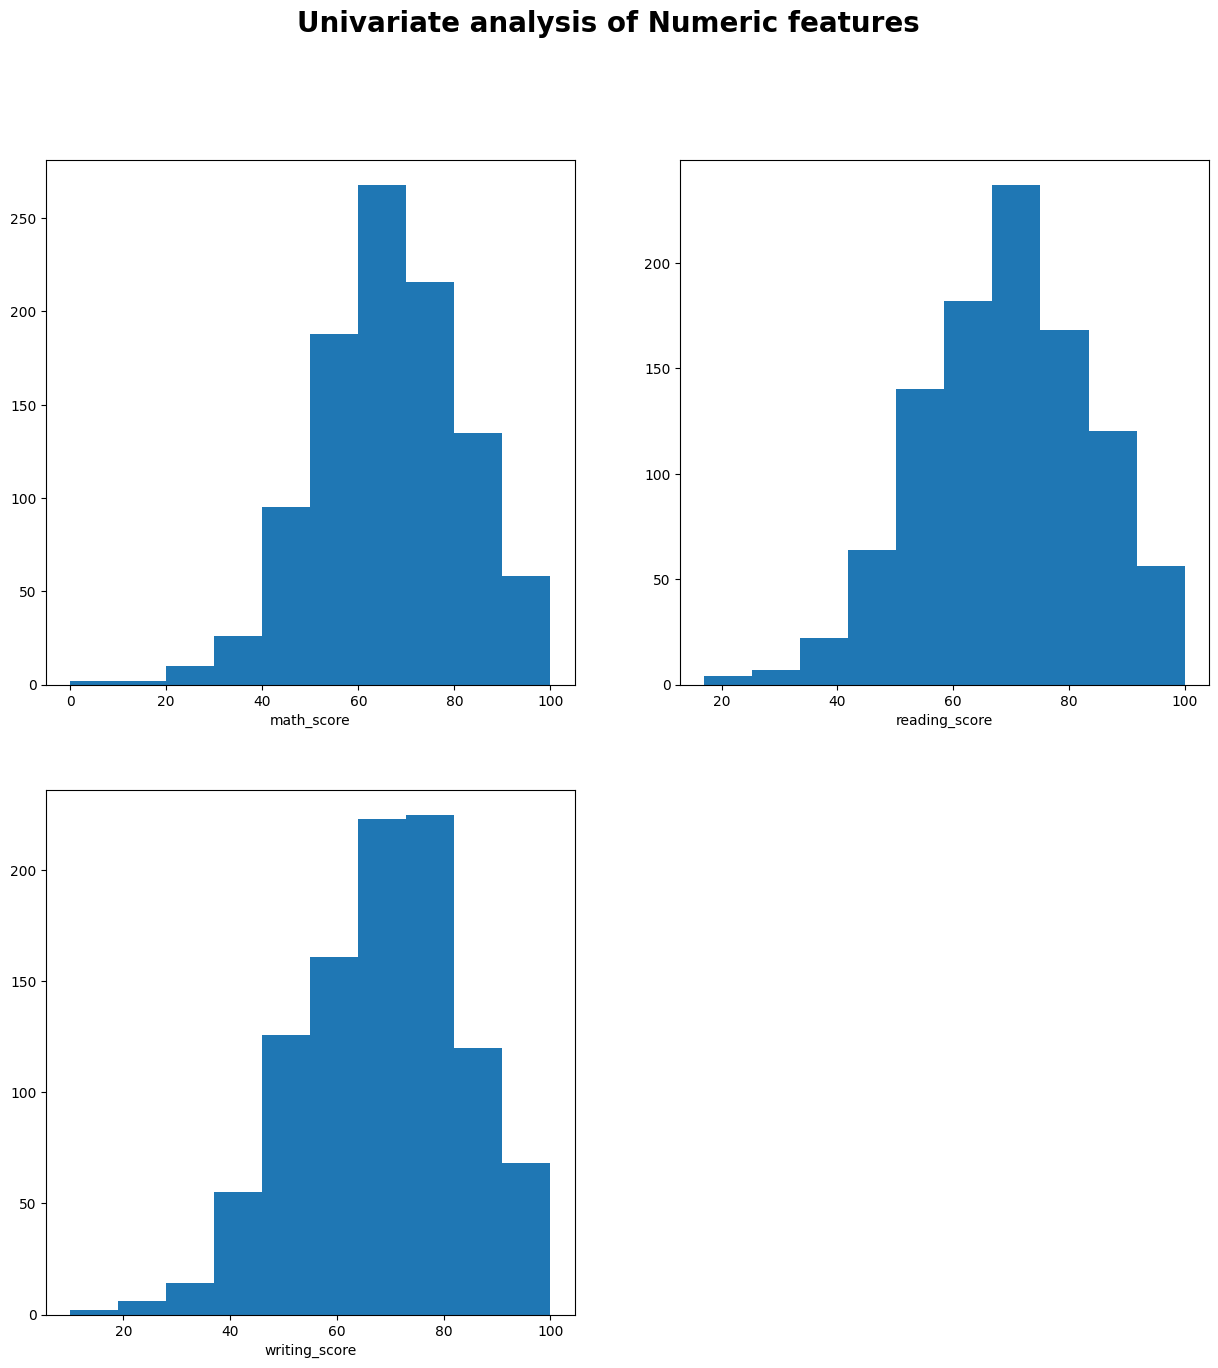

In [67]:
plt.figure(figsize=(15 , 15))
plt.suptitle('Univariate analysis of Numeric features'  , fontsize=20 , fontweight='bold')
for i in range(0 , len(numeric_col)):
    plt.subplot(2  , 2 , i+1)
    plt.hist(df[numeric_col[i]])
    plt.xlabel(numeric_col[i])
    plt.tight_layout

In [68]:
df['Total Marks']=df['math_score'] +df['reading_score'] + df['writing_score']

In [69]:
df['Avg Marks']=round(df['Total Marks']/3 , 2)

In [70]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Marks,Avg Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [71]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [72]:
df['gender']=encoder.fit_transform(df['gender'])

In [73]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Marks,Avg Marks
0,0,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,0,group C,some college,standard,completed,69,90,88,247,82.33
2,0,group B,master's degree,standard,none,90,95,93,278,92.67
3,1,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,1,group C,some college,standard,none,76,78,75,229,76.33


In [74]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total Marks', 'Avg Marks'],
      dtype='object')

### Q4. Describe the process of feature engineering in the context of the student performance data set. How  did you select and transform the variables for your model?

In [75]:
df=pd.read_csv("stud.csv")

In [76]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [77]:
categorical_features = [col for col in df.columns if df[col].dtypes == 'O']

In [78]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [79]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [80]:
df['gender']=encoder.fit_transform(df['gender'])

In [81]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [82]:
df['lunch']=encoder.fit_transform(df['lunch'])

In [83]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [84]:
df['test_preparation_course']=encoder.fit_transform(df['test_preparation_course'])

In [85]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [86]:
df['parental_level_of_education'].nunique()

6

In [87]:
from sklearn.preprocessing import OrdinalEncoder

In [88]:
encoder=OrdinalEncoder(categories=[['some high school' , 'high school' , 'some college' , "bachelor's degree" , "associate's degree","master's degree" ]])

In [89]:
encoded_values = encoder.fit_transform(df[['parental_level_of_education']])
encoded_values=encoded_values.flatten()
encoded_values=encoded_values.astype(int)
encoded_values

array([3, 2, 5, 4, 2, 4, 2, 2, 1, 1, 4, 4, 1, 2, 5, 0, 1, 0, 5, 4, 1, 2,
       2, 0, 3, 5, 2, 3, 1, 5, 2, 2, 5, 2, 2, 4, 4, 0, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 1, 4, 1, 2, 4, 2, 1, 0, 1, 4, 4, 2, 0, 3, 0, 4, 4, 0, 0,
       0, 2, 4, 4, 2, 2, 4, 0, 0, 4, 0, 3, 0, 5, 4, 1, 2, 4, 1, 2, 2, 4,
       2, 0, 3, 1, 1, 4, 2, 4, 0, 2, 2, 3, 2, 3, 4, 1, 2, 2, 5, 4, 4, 0,
       4, 1, 4, 2, 3, 1, 3, 3, 0, 2, 3, 4, 2, 1, 2, 1, 0, 2, 5, 3, 5, 0,
       2, 2, 3, 3, 0, 1, 4, 2, 0, 2, 2, 1, 2, 2, 0, 4, 3, 4, 0, 3, 4, 3,
       0, 2, 1, 2, 4, 4, 4, 2, 5, 1, 5, 3, 1, 5, 1, 2, 1, 0, 2, 4, 3, 5,
       1, 4, 5, 0, 5, 2, 1, 4, 0, 4, 1, 0, 0, 3, 4, 2, 0, 2, 5, 4, 0, 1,
       2, 3, 4, 2, 4, 4, 2, 0, 3, 1, 2, 2, 0, 2, 1, 4, 1, 0, 4, 1, 1, 0,
       1, 4, 0, 0, 4, 5, 2, 1, 0, 2, 2, 4, 3, 0, 3, 4, 3, 0, 2, 4, 1, 3,
       1, 2, 0, 4, 4, 1, 1, 1, 0, 2, 0, 5, 1, 2, 4, 4, 2, 5, 0, 2, 0, 1,
       1, 0, 3, 1, 4, 2, 3, 2, 4, 2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 2, 0, 4,
       4, 0, 3, 0, 4, 0, 0, 3, 1, 4, 0, 4, 1, 4, 2,

In [90]:
df['parental_level_of_education']=encoded_values

In [91]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,3,1,1,72,72,74
1,0,group C,2,1,0,69,90,88
2,0,group B,5,1,1,90,95,93
3,1,group A,4,0,1,47,57,44
4,1,group C,2,1,1,76,78,75


In [92]:
df['Total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Avg_score']=df['Total']/3

In [93]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Avg_score
0,0,group B,3,1,1,72,72,74,218,72.666667
1,0,group C,2,1,0,69,90,88,247,82.333333
2,0,group B,5,1,1,90,95,93,278,92.666667
3,1,group A,4,0,1,47,57,44,148,49.333333
4,1,group C,2,1,1,76,78,75,229,76.333333


In [94]:
mean_mapping=df.groupby('race_ethnicity')['Total'].mean().to_dict()
mean_mapping

{'group A': 188.97752808988764,
 'group B': 196.40526315789472,
 'group C': 201.3949843260188,
 'group D': 207.5381679389313,
 'group E': 218.25714285714287}

In [95]:
df['race_ethnicity']=df['race_ethnicity'].map(mean_mapping)

In [96]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Avg_score
0,0,196.405263,3,1,1,72,72,74,218,72.666667
1,0,201.394984,2,1,0,69,90,88,247,82.333333
2,0,196.405263,5,1,1,90,95,93,278,92.666667
3,1,188.977528,4,0,1,47,57,44,148,49.333333
4,1,201.394984,2,1,1,76,78,75,229,76.333333


In [97]:
df['race_ethnicity']=round(df['race_ethnicity']  , 2)

In [98]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Avg_score
0,0,196.41,3,1,1,72,72,74,218,72.666667
1,0,201.39,2,1,0,69,90,88,247,82.333333
2,0,196.41,5,1,1,90,95,93,278,92.666667
3,1,188.98,4,0,1,47,57,44,148,49.333333
4,1,201.39,2,1,1,76,78,75,229,76.333333


### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to  these features to improve normality?

In [99]:
df=pd.read_csv("winequality-red.csv")

In [100]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
df.columns 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [102]:
len(df.columns)

12

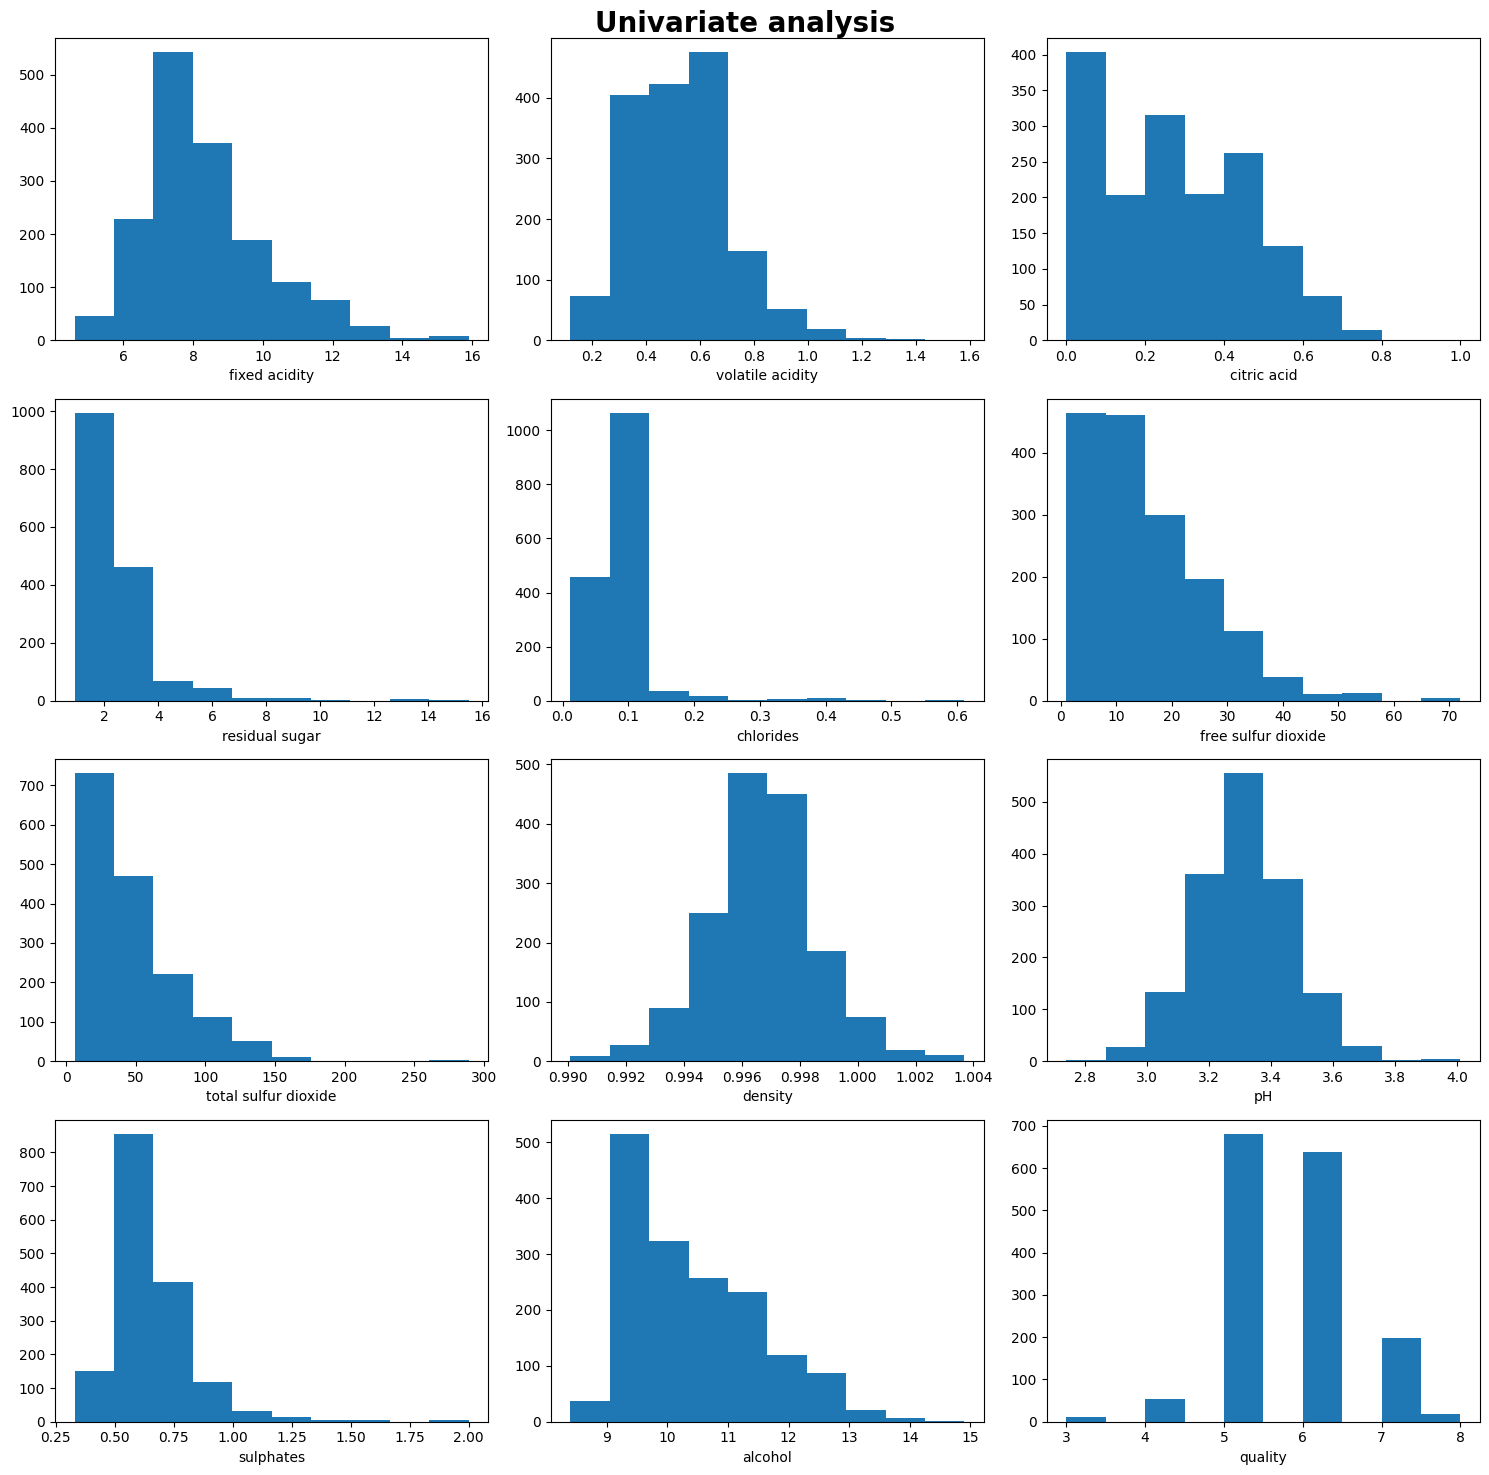

In [103]:
plt.figure(figsize=(15  , 15))
plt.suptitle('Univariate analysis' , fontsize=20, fontweight='bold')
columns=df.columns
for i in range(0 , len(columns)):

    plt.subplot(4 , 3 , i+1)
    plt.hist(df[columns[i]])
    plt.xlabel(columns[i])
    plt.tight_layout()

In [104]:
for col in df.columns:
    mean = np.mean(df[col])
    median = np.median(df[col])
    print(f'{col} - Mean : {round(mean , 2)} , Median : {round(median , 2)}')
    if mean > median:
        print("Mean > Median")
    else:
        print("Median > Mean")
    print()

fixed acidity - Mean : 8.32 , Median : 7.9
Mean > Median

volatile acidity - Mean : 0.53 , Median : 0.52
Mean > Median

citric acid - Mean : 0.27 , Median : 0.26
Mean > Median

residual sugar - Mean : 2.54 , Median : 2.2
Mean > Median

chlorides - Mean : 0.09 , Median : 0.08
Mean > Median

free sulfur dioxide - Mean : 15.87 , Median : 14.0
Mean > Median

total sulfur dioxide - Mean : 46.47 , Median : 38.0
Mean > Median

density - Mean : 1.0 , Median : 1.0
Median > Mean

pH - Mean : 3.31 , Median : 3.31
Mean > Median

sulphates - Mean : 0.66 , Median : 0.62
Mean > Median

alcohol - Mean : 10.42 , Median : 10.2
Mean > Median

quality - Mean : 5.64 , Median : 6.0
Median > Mean



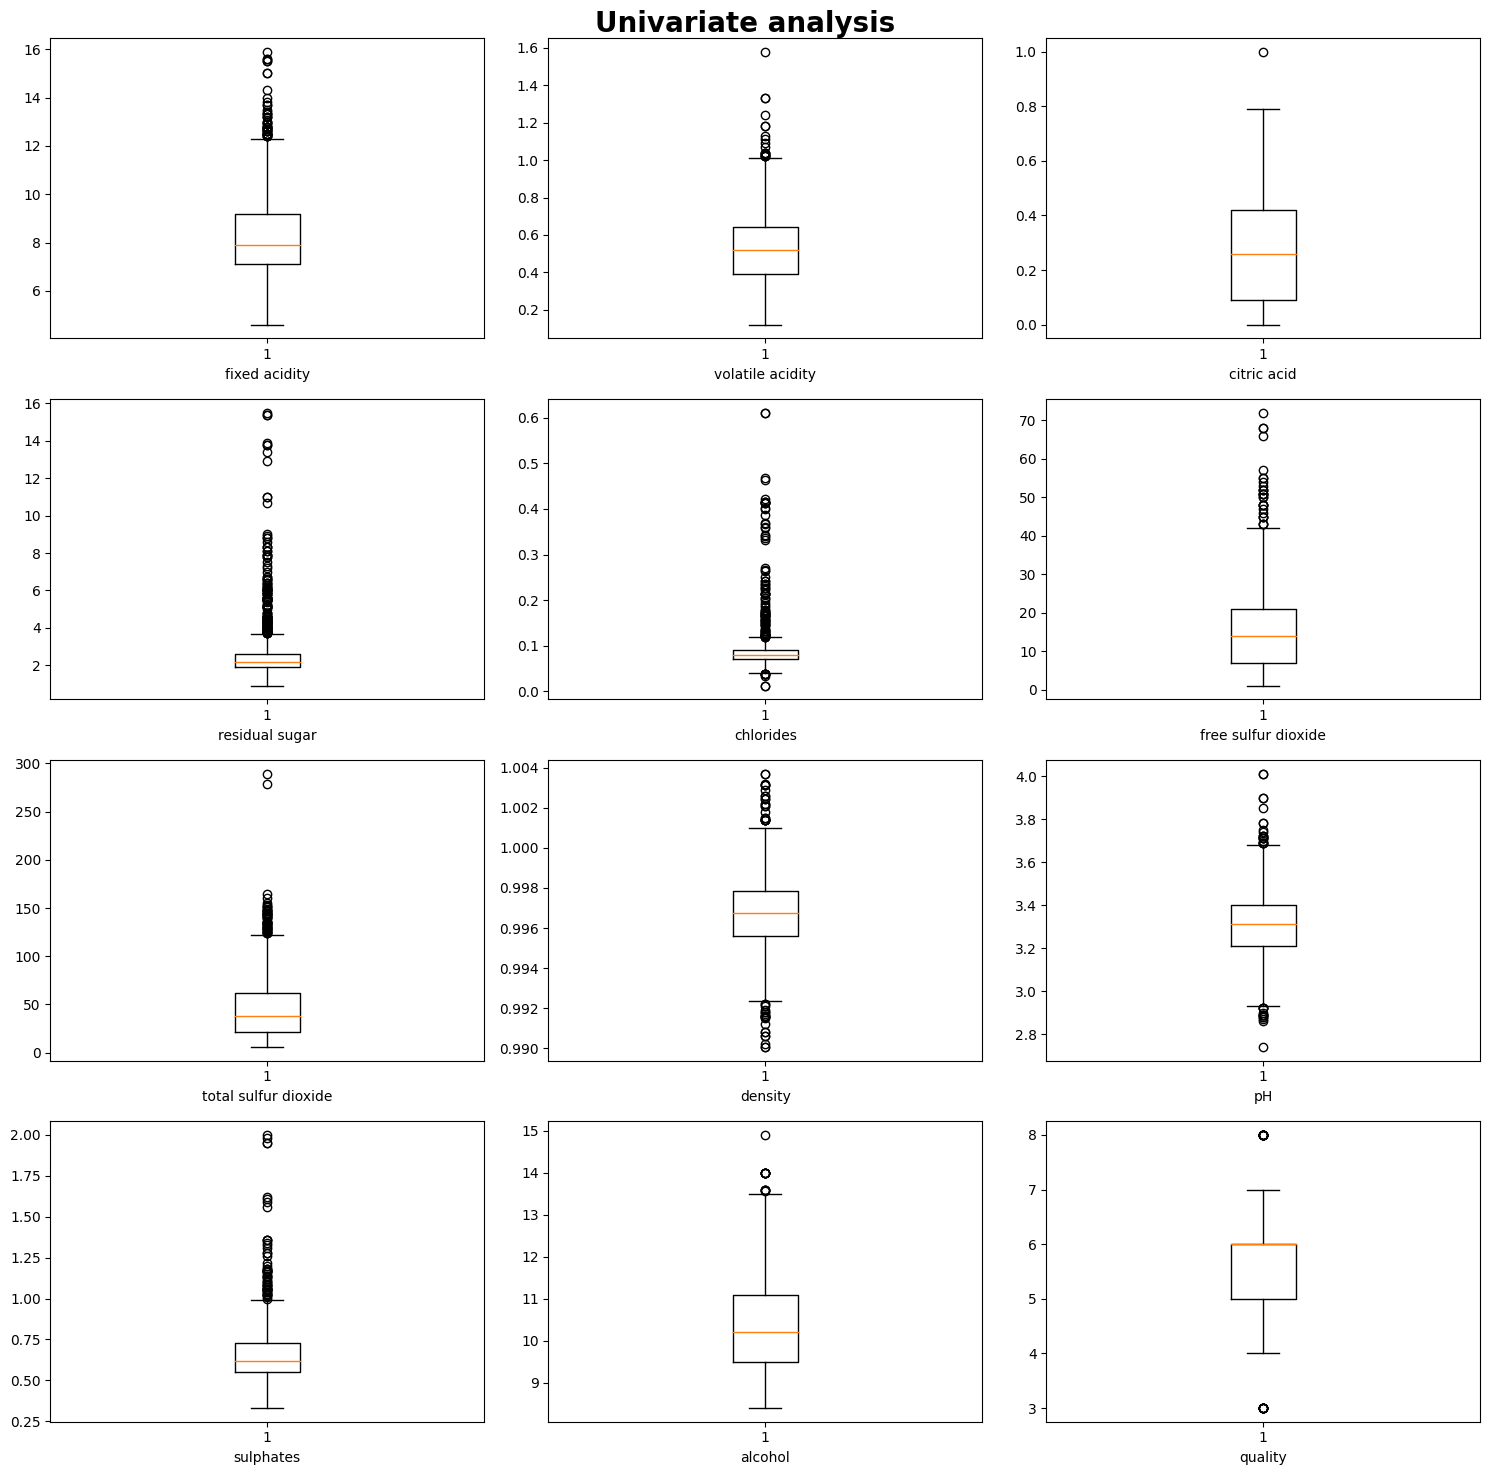

In [105]:
plt.figure(figsize=(15  , 15))
plt.suptitle('Univariate analysis' , fontsize=20, fontweight='bold')
columns=df.columns
for i in range(0 , len(columns)):

    plt.subplot(4 , 3 , i+1)
    plt.boxplot(df[columns[i]])
    plt.xlabel(columns[i])
    plt.tight_layout()

In [106]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [107]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


##### **Fixed Acidity** : The distribution of data in this column is slightly right Skewed due to presence of few outliers on higher side (> 12 ). It has  a thin tail which suggest presence of very few outliers but due to this the mean > median

**volatile acidity**  : The distribution almost normal as the difference between mean and median is negligible but there exists a few outliers that streches the mean to right causing mean > median , peak can be observed between 0.4 and 0.6

**citric acid** : This is multimodal distribution with 3 peaks , at 0.1 , 0.3 , 0.5 and there exists on 1 outlier with Mean slightly greater than median

**residual sugar** : This is right skewed distribution with a few outliers on higher side (> 4) . Average residual sugar is : 2.54 in wine

**Chlorides** : This is right skewed graph with a few outliers on higher side and averge chloride is : 2.54 

**free sulfur dioxide** : This is again a right skewed dist with a few outliers(>40) and mean at 15.78 

**total sulfur dioxide** : This is a right skewed dist with a thin tail which suggests presence of few outliers , aloso confirmed by boxplot and Mean > Median . Outliers exists >110

**density** : This is a normal dist with mean = median =1

**pH** : Normal dist with mean = medan = 3.31

**sulphate** : Right skewed with a thin tail ie few outliers and not  a continuous dist . Std is low which suggest that the data is not spreaded 50% of the data falls under mean . 75% of the toatal data is very close to mean 

**alcohol** : This is a right skewed distribution with negligible difference in mean and median . There exist 1 outlier at higher end and lower end . 75% of the data falls with 11 , very close to the mean value 

In [109]:
df.shape

(1599, 12)

In [110]:
corr_matrix=df.corr()
corr_matrix.loc[: , 'quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

### Positive Correlation with Quality: Alcohol , Sulphates , citric acid , fixed acidity , residual sugar

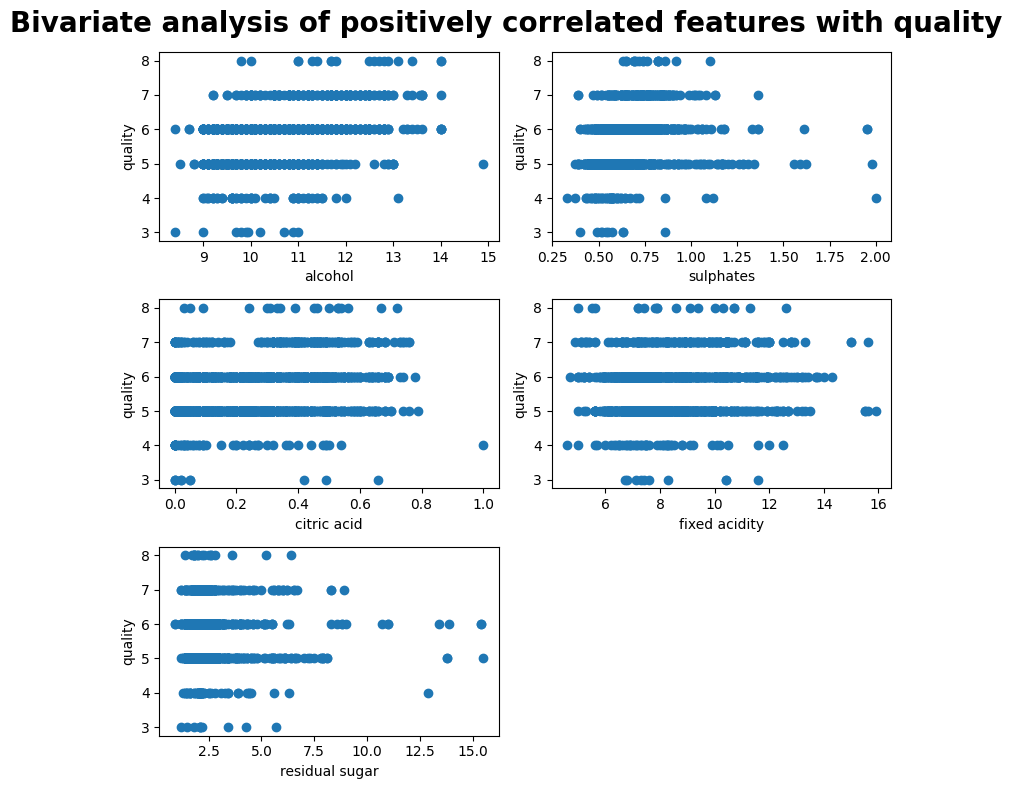

In [111]:
postive_corr=['alcohol' , 'sulphates' , 'citric acid'  , 'fixed acidity' ,  'residual sugar']
plt.figure(figsize=(8 , 8))
plt.suptitle("Bivariate analysis of positively correlated features with quality" , fontsize=20 , fontweight='bold')

for i in range(0 , len(postive_corr)):

    plt.subplot(3,2 , i+1)
    plt.scatter(df[postive_corr[i]] , df['quality'])
    plt.xlabel(postive_corr[i])
    plt.ylabel('quality')
    plt.tight_layout()

**Alcohol vs Qulaity** -  For high wine quality range of alcohol is >9 to <=14 and for xtreme outliers the quality of wine is observed to be less

**Sulphates vs Qulaity** - For best quality of wines sulphates are in rage 0.40 to 1.50

**Citric vs Qulaity** - For citric acid in range 0 to 0.8 best quality of wines are obeserved 

**Fixed acidity vs Qulaity** : Fixed acidity : <14 

**residual sugar vs Qulaity** : For residual sugar < 10 , best quality of wine can be seen

### Negative correlation with Quality : volatile acidity , total sulfur dioxide , chlorides , pH , free sulfur dioxide

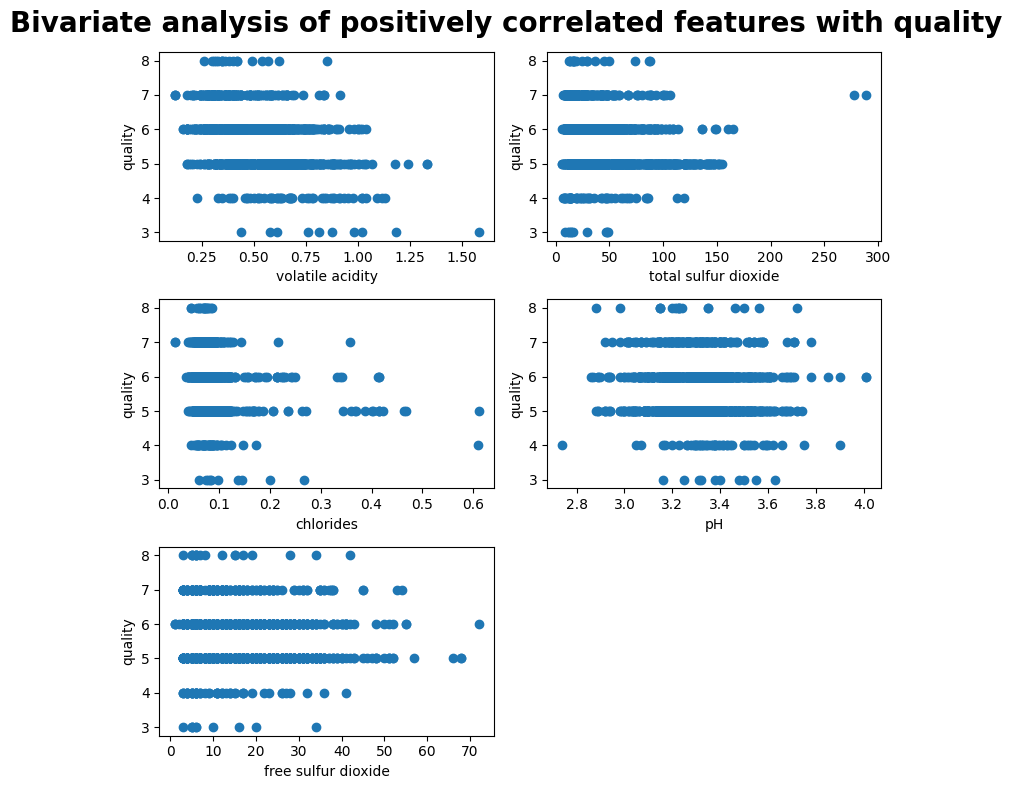

In [112]:
postive_corr=['volatile acidity' , 'total sulfur dioxide' , 'chlorides' , 'pH' , 'free sulfur dioxide']
plt.figure(figsize=(8 , 8))
plt.suptitle("Bivariate analysis of positively correlated features with quality" , fontsize=20 , fontweight='bold')

for i in range(0 , len(postive_corr)):

    plt.subplot(3,2 , i+1)
    plt.scatter(df[postive_corr[i]] , df['quality'])
    plt.xlabel(postive_corr[i])
    plt.ylabel('quality')
    plt.tight_layout()

In [114]:
from scipy.stats import shapiro, normaltest, boxcox

### Check the normality

In [116]:
shapiro(df['alcohol'])

ShapiroResult(statistic=0.9288375377655029, pvalue=6.63998167657323e-27)

In [117]:
shapiro(df['density'])

ShapiroResult(statistic=0.9908602237701416, pvalue=1.9199848821926935e-08)

In [119]:
np.mean(df['density'])
np.median(df['density'])


0.99675

In [115]:
for col in df.columns:
    stat, p = shapiro(df[col])
    print(f"{col}: p-value = {p:.5f}")
    
    stat, p = normaltest(df[col])
    print(f"{col} (D'Agostino test): p-value = {p:.5f}\n")


fixed acidity: p-value = 0.00000
fixed acidity (D'Agostino test): p-value = 0.00000

volatile acidity: p-value = 0.00000
volatile acidity (D'Agostino test): p-value = 0.00000

citric acid: p-value = 0.00000
citric acid (D'Agostino test): p-value = 0.00000

residual sugar: p-value = 0.00000
residual sugar (D'Agostino test): p-value = 0.00000

chlorides: p-value = 0.00000
chlorides (D'Agostino test): p-value = 0.00000

free sulfur dioxide: p-value = 0.00000
free sulfur dioxide (D'Agostino test): p-value = 0.00000

total sulfur dioxide: p-value = 0.00000
total sulfur dioxide (D'Agostino test): p-value = 0.00000

density: p-value = 0.00000
density (D'Agostino test): p-value = 0.00000

pH: p-value = 0.00000
pH (D'Agostino test): p-value = 0.00000

sulphates: p-value = 0.00000
sulphates (D'Agostino test): p-value = 0.00000

alcohol: p-value = 0.00000
alcohol (D'Agostino test): p-value = 0.00000

quality: p-value = 0.00000
quality (D'Agostino test): p-value = 0.00018



In [120]:
import seaborn as sns

## Log TRansformation

<Axes: xlabel='fixed acidity', ylabel='Density'>

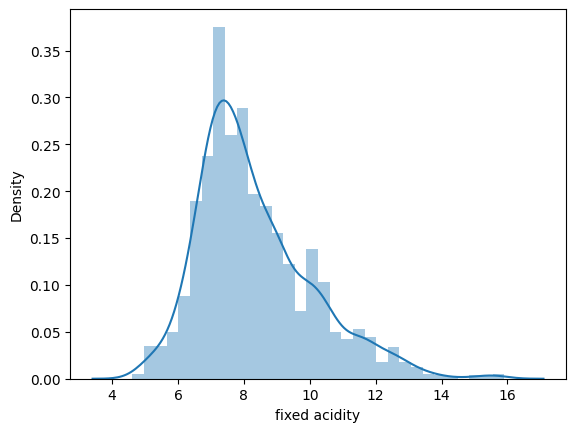

In [125]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['fixed acidity'])

<Axes: xlabel='fixed_acidity_log_transform', ylabel='Density'>

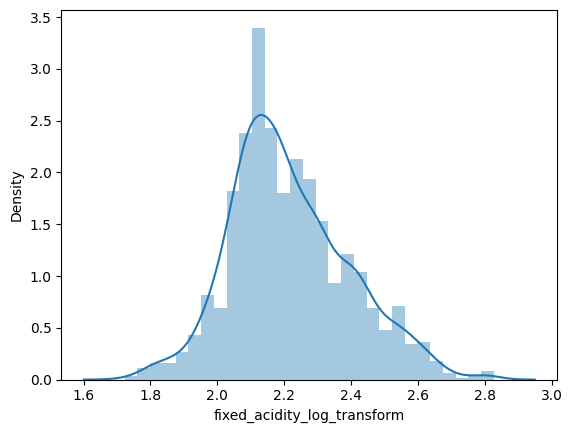

In [127]:
df['fixed_acidity_log_transform']=np.log1p(df['fixed acidity'])
sns.distplot(df['fixed_acidity_log_transform'])

<Axes: xlabel='fixed_acidity_log_transform', ylabel='Density'>

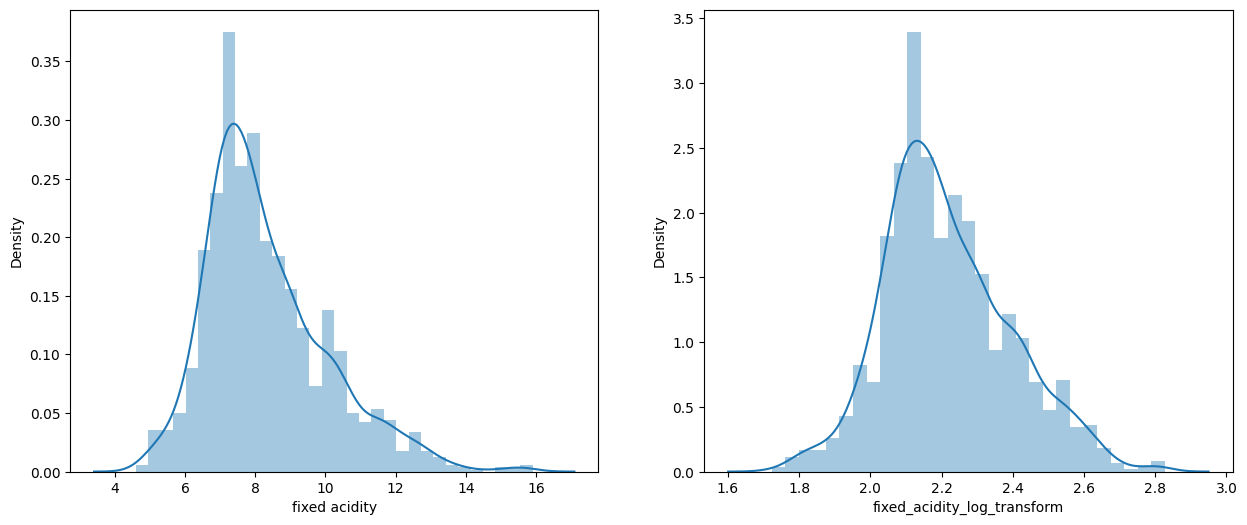

In [130]:
plt.figure(figsize=(15 , 6))
plt.subplot(1 , 2 , 1)
sns.distplot(df['fixed acidity'])
plt.subplot(1 ,2,2)
sns.distplot(df['fixed_acidity_log_transform'])

In [132]:
df['total sulfur dioxide log transform']=np.log1p(df['total sulfur dioxide'])

<Axes: xlabel='total sulfur dioxide log transform', ylabel='Density'>

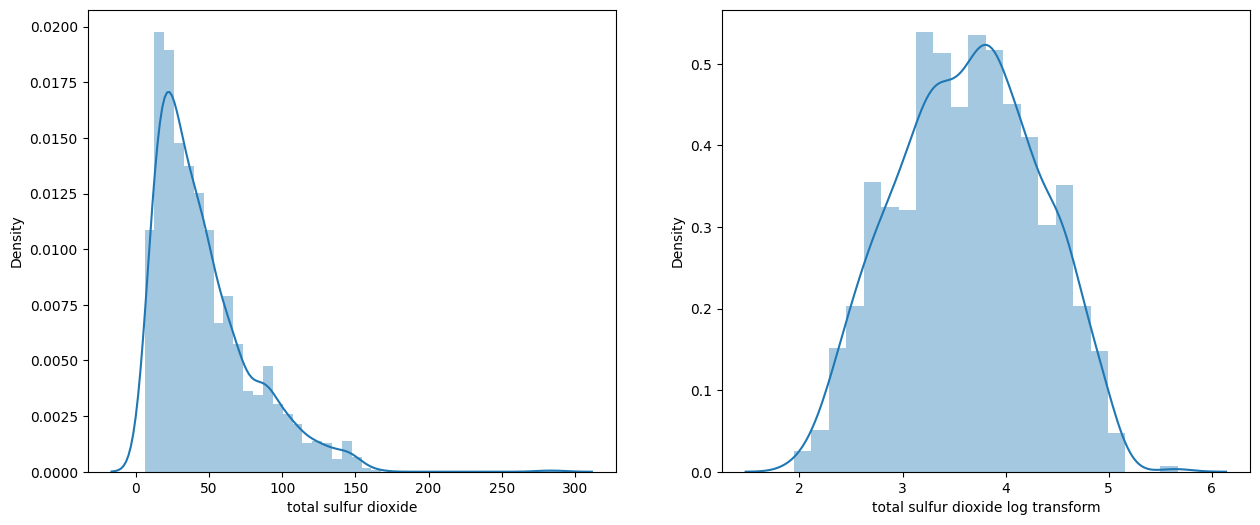

In [133]:
plt.figure(figsize=(15 , 6))
plt.subplot(1 , 2 , 1)
sns.distplot(df['total sulfur dioxide'])
plt.subplot(1 ,2,2)
sns.distplot(df['total sulfur dioxide log transform'])

## Square root transformation

In [135]:
df['free sulfur dioxide log transform']=np.sqrt(df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide log transform', ylabel='Density'>

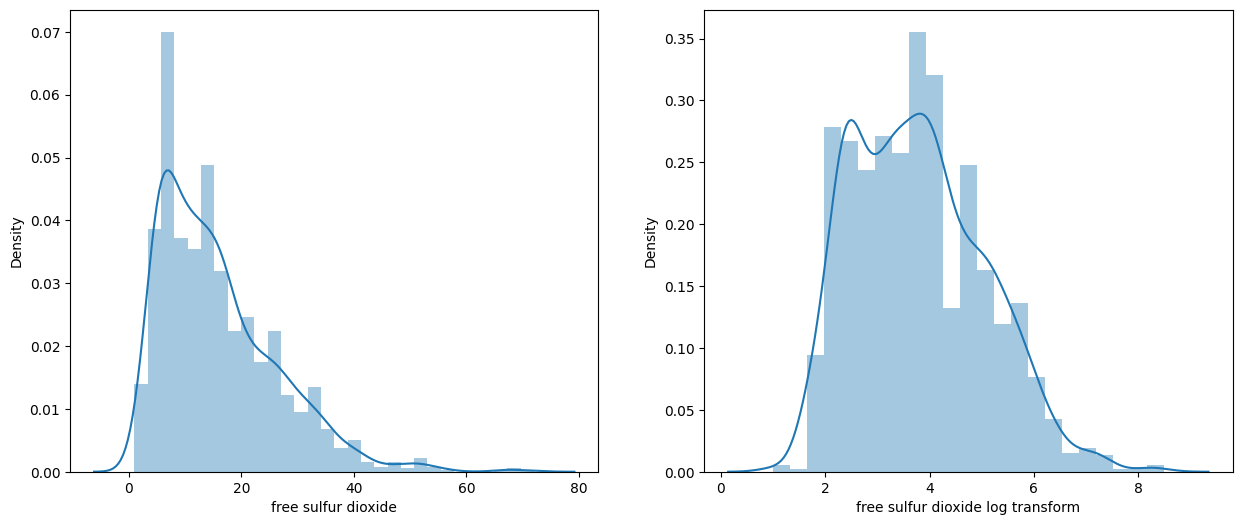

In [136]:
plt.figure(figsize=(15 , 6))
plt.subplot(1 , 2 , 1)
sns.distplot(df['free sulfur dioxide'])
plt.subplot(1 ,2,2)
sns.distplot(df['free sulfur dioxide log transform'])

<Axes: xlabel='chlorides', ylabel='Density'>

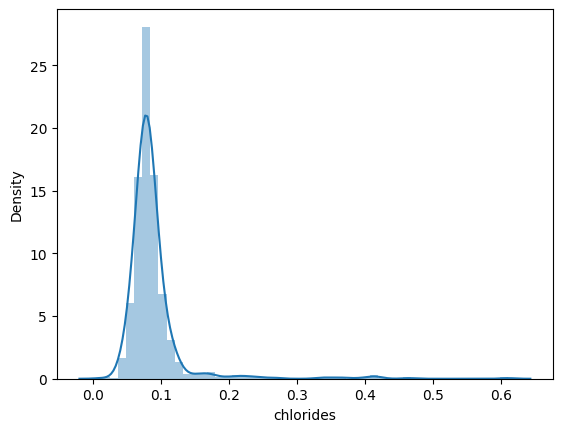

In [138]:
sns.distplot(df['chlorides'])

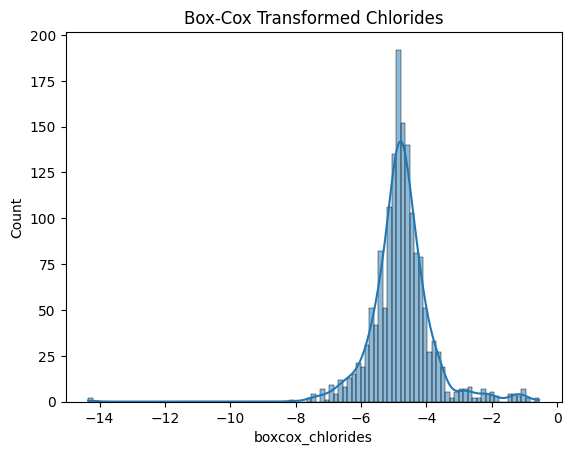

In [137]:
from scipy.stats import boxcox

df['boxcox_chlorides'], _ = boxcox(df['chlorides'] + 1e-6)  # Small value to avoid zero issues
sns.histplot(df['boxcox_chlorides'], kde=True)
plt.title("Box-Cox Transformed Chlorides")
plt.show()


In [139]:
df['alcohol_reciprocal']=1/df['alcohol']

In [142]:
df['total sulfur dioxide reciprocal']=1/df['total sulfur dioxide']

<Axes: xlabel='total sulfur dioxide reciprocal', ylabel='Density'>

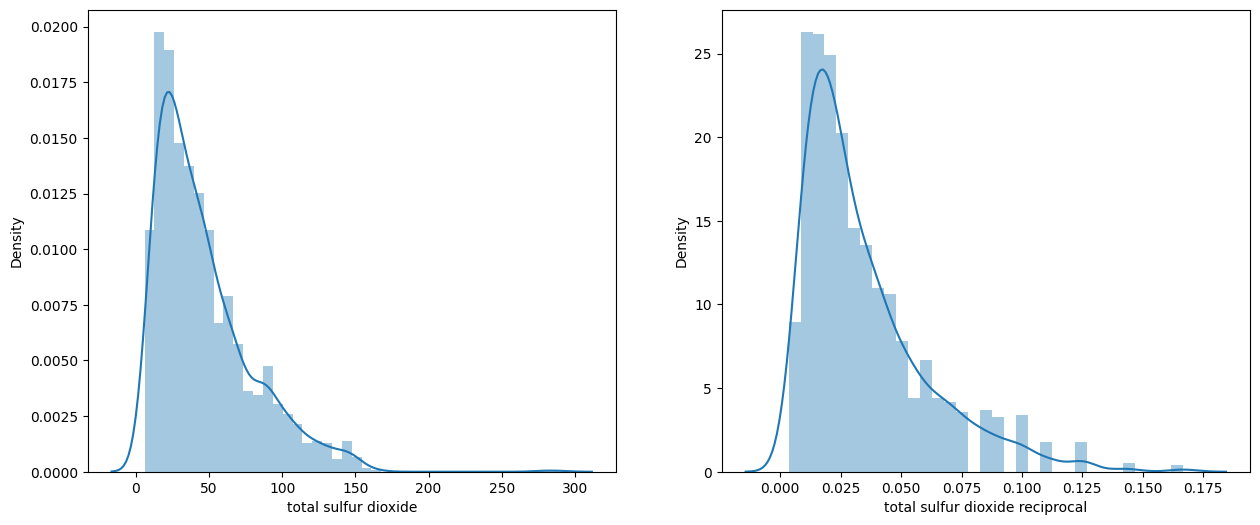

In [143]:
plt.figure(figsize=(15 , 6))
plt.subplot(1 , 2 , 1)
sns.distplot(df['total sulfur dioxide'])
plt.subplot(1 ,2,2)
sns.distplot(df['total sulfur dioxide reciprocal'])

<Axes: xlabel='alcohol_reciprocal', ylabel='Density'>

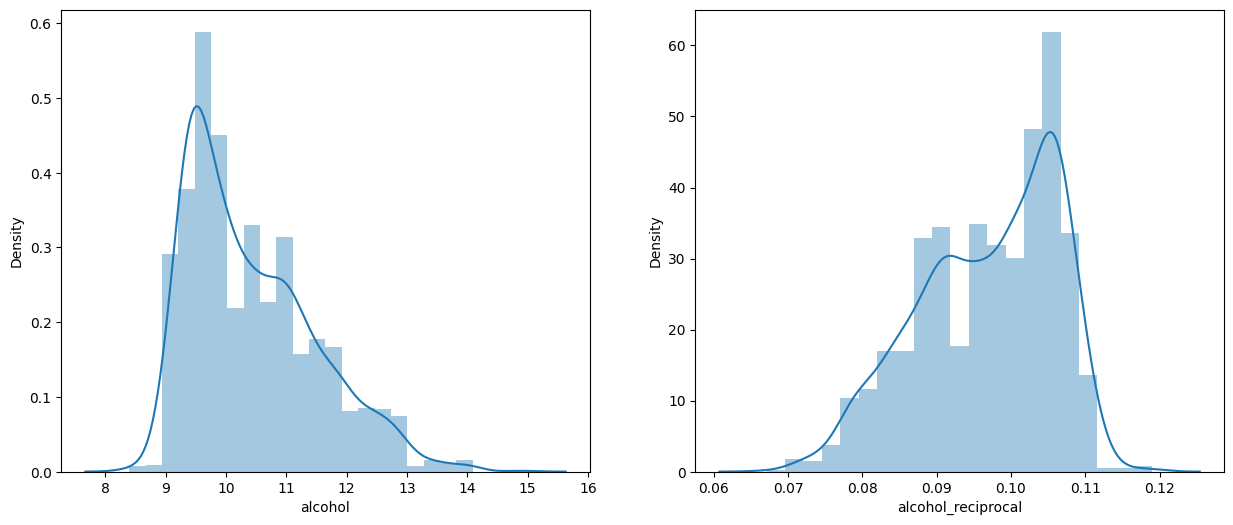

In [144]:
plt.figure(figsize=(15 , 6))
plt.subplot(1 , 2 , 1)
sns.distplot(df['alcohol'])
plt.subplot(1 ,2,2)
sns.distplot(df['alcohol_reciprocal'])

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [145]:
from sklearn.decomposition import PCA
from sklearn.preprocessing  import StandardScaler

In [146]:
df=pd.read_csv("winequality-red.csv")

In [147]:
X=df.drop('quality' , axis=1)

In [148]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [149]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [150]:
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [151]:
pca=PCA()

In [152]:
X_pca=pca.fit_transform(X_scaled)
X_pca

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.40430898,
         0.77943963, -0.44978056]])

In [153]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

In [154]:
cumulative_variance=np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

In [155]:
# Find the number of components for 90% variance
components_for_90_variance = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nMinimum number of components to explain 90% variance: {components_for_90_variance}")



Minimum number of components to explain 90% variance: 7


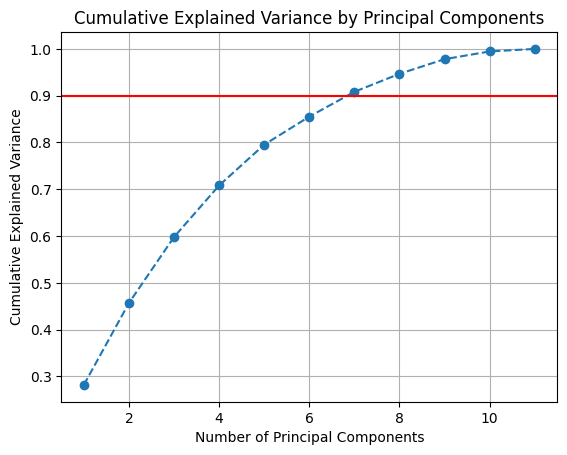

In [156]:
import matplotlib.pyplot as plt

# Scree plot
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()
